# <a id='toc1_'></a>[Solow-Swan model with Limited Ressources](#toc0_)

This project aims to solve the Solow-Swan model with limited ressources. The model is a neoclassical growth model, which is used to describe long-run economic growth in terms of productivity, capital accumulation, population growth, and technological progress. The model is based on the assumption that the economy is closed, meaning that there is no trade with other countries. The model is also based on the assumption that the economy is in a steady state, meaning that the capital stock per worker is constant. 

This project includes the solow model with the implementation of **Limited Resources**

**Table of contents**<a id='toc0_'></a>    
- [Solow-Swan model with Limited Ressources](#toc1_)    
- [Introduction](#toc2_)    
  - [Baseline Solow Model](#toc2_1_)    
  - [Analytical Steady State of the Model](#toc2_2_)    
  - [Numerical Solution of the Model](#toc2_3_)    
    - [Methods: Bisect, Brent, and Secant](#toc2_3_1_)    
    - [Results](#toc2_3_2_)    
  - [Further analysis](#toc2_4_)    
    - [Simulation of the model](#toc2_4_1_)    
    - [Extended simulation of the model](#toc2_4_2_)    
  - [Conclusion](#toc2_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [9]:
import sympy as sm
from scipy import optimize
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from ipywidgets import interact, FloatSlider, IntSlider, Checkbox

#Set seed
np.random.seed(42)

plt.rcParams['figure.figsize'] = [16, 8]

%load_ext autoreload
%autoreload 2

from modelproject_copy import SolowModelClass
from modelproject_copy import analytic_ss

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


----
# <a id='toc2_'></a>[Introduction](#toc0_)

## <a id='toc2_1_'></a>[Baseline Solow Model](#toc0_)

1. $K_t$ is capital
2. $L_t$ is labor (growing with a constant rate of $n$)
3. $A_t$ is technology (growing with a constant rate of $g$)
4. $Y_t = F(K_t,A_t,L_t)$ is GDP

The **production function** is assumed of form **Cobb-Douglas** i.e.

$$
Y_t = F(K_{t},A_{t},L_{t})=K_{t}^{\alpha}(A_{t}L_{t})^{1-\alpha}, \ \alpha \leq 1
$$


**Saving** is a constant fraction of GDP

$$ 
S_t = s_YY_t,\,s_Y\in(0,1)
$$

such that **capital accumulates** according to

$$
K_{t+1}=S_{t}+(1-\delta)K_{t}, \delta \in (0,1)
$$

The **population** grows with n each year 

$$
L_{t+1} = (1+n)L_t, n > -1 
$$

The **technology** growth follows an exogenous path of 

$$
A_{t+1} = (1+g)A_t
$$ 

#Extension 
We will extend the **Solow-model** with an exhuastible ressource $R_t$

5. $R_t$ is the stock of the limited ressource which is used up over time
6. $E_t$ is the amount of the ressource used in period $t$

The updated production function now is **production function**

$$
Y_t = F(K_{t},E_{t},A_{t},L_{t})=K_{t}^{\alpha}(A_{t}L_{t})^{1-\varepsilon-\alpha}E_t^{\varepsilon}, \alpha + \varepsilon \leq 1
$$

The **limited ressource** has a reserve $R_0$ and in each period $E_t$ of this reserve is used. Thus $E_t$ and $R_t$ follows

$$
E_t = s_E R_t, s_E \in (0,1)
$$

$$
R_{t} = R_{t-1} - E_{t-1} = (1-s_E)R_{t-1} = (1-s_E)^t R_0
$$

**Saving**, **capital accumulation**, **population growth** and **technology growth** is similar to the baseline Solow Model. Further it is seen how when $\varepsilon = 0$ the model returns to the baseline model.

----
## <a id='toc2_2_'></a>[Analytical Steady State of the Model](#toc0_)

We will evaluate the steady state in the capital output ratio, $z_t \equiv \frac{K_t}{Y_t}$.
$$
z_{t+1} = \frac{K_{t+1}}{Y_{t+1}} = \frac{K_{t+1}^{1-\alpha}}{(A_{t+1}L_{t+1})^{1-\varepsilon-\alpha}E_{t+1}^\varepsilon}
$$

Inserting savings into the capital accumulation equation and rewriting yields
$$
z_{t+1} = \frac{(s_{Y} Y_{t} +(1-\delta)K_{t})^{1-\alpha}}{(A_{t+1}L_{t+1})^{1-\varepsilon-\alpha}E_{t+1}^\varepsilon} = \frac{(s_{Y} +(1-\delta)z_t)^{1-\alpha}}{((1+g)(1+n))^{1-\varepsilon-\alpha}(1-s_E)^{\varepsilon}} \frac{Y_t^{1-\alpha}}{(A_{t}L_{t})^{1-\varepsilon-\alpha}E_{t}^\varepsilon} = \frac{(s_{Y} +(1-\delta)z_t)^{1-\alpha}}{((1+g)(1+n))^{1-\varepsilon-\alpha}(1-s_E)^{\varepsilon}}z_t^\alpha
$$

We use **sympy** to find an analytical expression for the steady state, i.e. solve

$$
z^* = \frac{(s_{Y} +(1-\delta)z^*)^{1-\alpha}}{((1+g)(1+n))^{1-\varepsilon-\alpha}(1-s_E)^{\varepsilon}}(z^*)^\alpha
$$

However, **sympy** for some reason has some problems solving this, thus, we start by helping it a bit on the right track
$$
(z^*)^{1-\alpha} = \frac{(s_{Y} +(1-\delta)z^*)^{1-\alpha}}{((1+g)(1+n))^{1-\varepsilon-\alpha}(1-s_E)^{\varepsilon}} \Leftrightarrow
$$

$$
z^* = \frac{1}{\left(((1+g)(1+n))^{1-\varepsilon-\alpha}(1-s_E)^{\varepsilon}\right)^{\frac{1}{1-\alpha}}} (s_{Y} +(1-\delta)z^*)
$$

Now **sympy** can solve the equation and provide an analytical solution

In [10]:
# a. analytically solve for steady state
analytical = analytic_ss(ext = False, do_print = True)
analytical_ext = analytic_ss(ext = True, do_print = True)


The analytical steady state of the baseline model is:


Eq(z, s_Y/(delta - 1 + ((g*n + g + n + 1)**(1 - alpha))**(-1/(alpha - 1))))

The analytical steady state of the extended model is:


Eq(z, s_Y/(delta - 1 + ((1 - s_E)**epsilon*(g*n + g + n + 1)**(-alpha - epsilon + 1))**(-1/(alpha - 1))))

-----
## <a id='toc2_3_'></a>[Numerical Solution of the Model](#toc0_)

We will nummerically solve this model using 2 different methods – **Bisect**, and **Brent** – and evaluate their precession when comparing to the analytical solution evaluated in the same parameter values.

To solve the model we evaluate when it holds that
$$
0 = z_{t+1}-z_t = \frac{(s_{Y} +(1-\delta)z_t)^{1-\alpha}}{((1+g)(1+n))^{1-\varepsilon-\alpha}(1-s_E)^{\varepsilon}}z_t^\alpha - z_t
$$

All the numerical optimizers are defined in the [modelproject.py](modelproject.py) thus, here we just call them

In [11]:
# a. loading the baseline model
model = SolowModelClass()
model.setup()

# b. evaluate analytical steady state
zstar_analytic = model.evaluate_ss(analytical_ext, ext=True,do_print=True)

# c. solve for nummerical steady state and evaluate if pratically equivalent to analytical steady state
zstar_bisect = model.solve_ss(method='bisect', ext=True, do_print=True).root
print(f'Is equal to analytical Steady State: {np.isclose(zstar_bisect, zstar_analytic, rtol=1e-5)}')
zstar_secant = model.solve_ss(method='secant', ext=True, do_print=True).root
print(f'Is equal to analytical Steady State: {np.isclose(zstar_secant, zstar_analytic, rtol=1e-5)}')
zstar_brent = model.solve_ss(method='brentq', ext=True, do_print=True).root
print(f'Is equal to analytical Steady State: {np.isclose(zstar_brent, zstar_analytic, rtol=1e-5)}')



Analytical solution: z = 1.4285816837546637
Numerical solution using bisect
      converged: True
           flag: 'converged'
 function_calls: 48
     iterations: 46
           root: 1.4285816837547476
Is equal to analytical Steady State: True
Numerical solution using secant
      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 1.4285816837546652
Is equal to analytical Steady State: True
Numerical solution using brentq
      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 1.4285816837546623
Is equal to analytical Steady State: True


### <a id='toc2_3_1_'></a>[Methods: Bisect, Brent and Secant](#toc0_)
The code first obtains the analytical solution for the steady state of the model. The steady state is a point where the capital output ration no longer changes. This is calculated through the function analytic_ss, which uses the standard formula for the steady state in the Solow model.

The code then numerically solves the same model using three different methods: bisect, brent and secant. 
These are different numerical methods used to find the root of a function, i.e., the value for which the function equals zero. In this case, the function is the difference between the capital output ration at time t+1 and time t, which is equal to zero at the steady state.

- The bisect method works by repeatedly dividing an interval into two subintervals and then selecting the subinterval where the root lies based on the sign of the function at the midpoint. 

- The secant method is a root-finding algorithm that uses a succession of roots of secant lines to better approximate a root of a function. Thus, it does not require that the root remain bracketed, like the bisection method does, and hence it does not always converge.

- The brent method, also known as Brent's method, combines the bisection method, the secant method, and inverse quadratic interpolation. It generally provides better performance than the bisection method.


Lastly the code evaluates the steady state obtained from the analytical solution using the function model.evaluate_ss. This compares the results obtained from the numerical methods to the analytical solution.


### <a id='toc2_3_2_'></a>[Results](#toc0_)

1. The analytical solution is approximately 1.40282077642438, which is very close to the solutions found by the numerical methods. This suggests that the numerical methods were implemented correctly and were able to accurately find the steady state of the Solow growth model.

2. The bisect method took 46 iterations and 48 function calls to find a steady state of approximately 1.4028207764242397.

3. The secant method took just 6 iterations and 5 function calls to converge to a steady state of approximately 1.4285816837546652.

4. The brentq method is more efficient than bisect, taking only 7 iterations and 8 function calls to find a steady state of approximately 1.4028207764243779. However, in terms of calls and iterations it does not outperform the secant method in this case.




**Conclusion**

We find the methods to provide robust and viable results for estimating the Solow Model. 

Additionally the convergence plot is shown below.

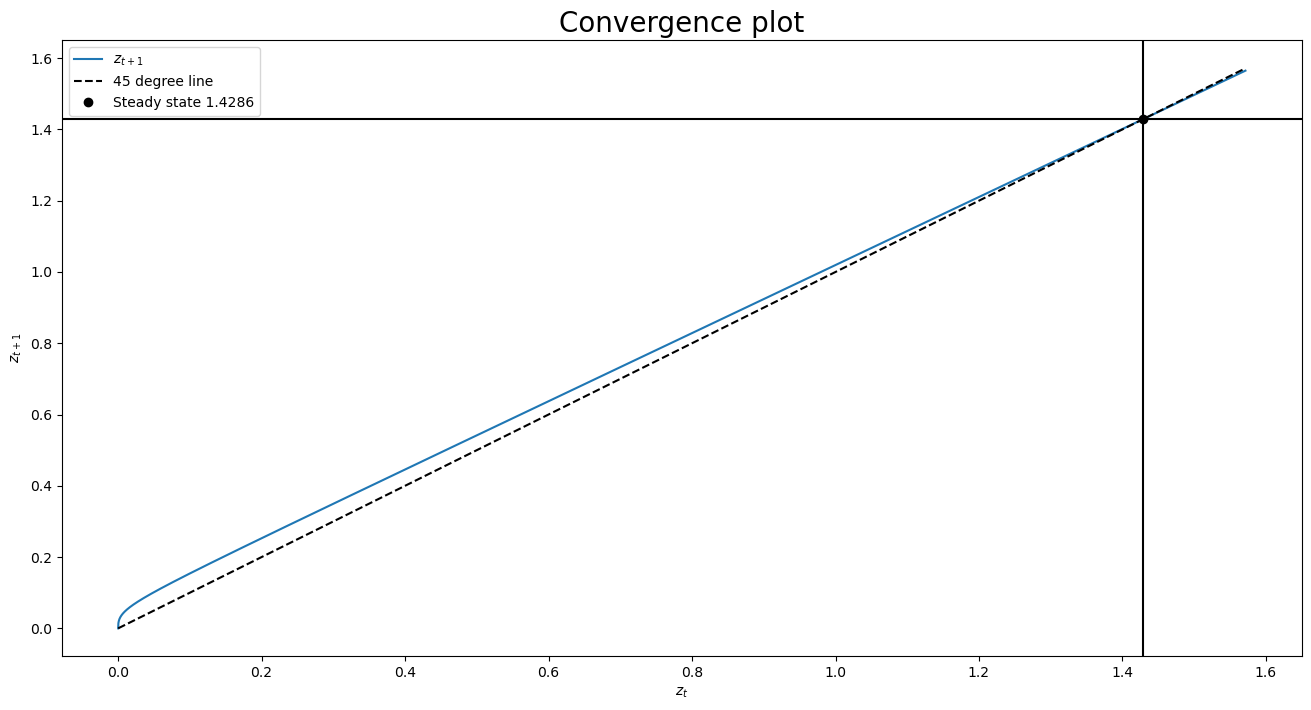

In [12]:
model.convergence_plot(ext=True)

----
## <a id='toc2_4_'></a>[Further analysis](#toc0_)

In the next section we have simulated both the baseline and the extended model. From this we see how when the limited ressource is included even though the two models have the same initial value, the model with the limited ressource grows at a slower pace as the ressource is depleted.


### <a id='toc2_4_1_'></a>[Simulation of the model](#toc0_)

The plot below shows the baseline simulated model. The plot shows the Capital stock $K_t$, Labor $L_t$, Output $Y_t$ and Technology $A_t$.

- 100 periods
- Baseline Solow Model
- 4 Plots


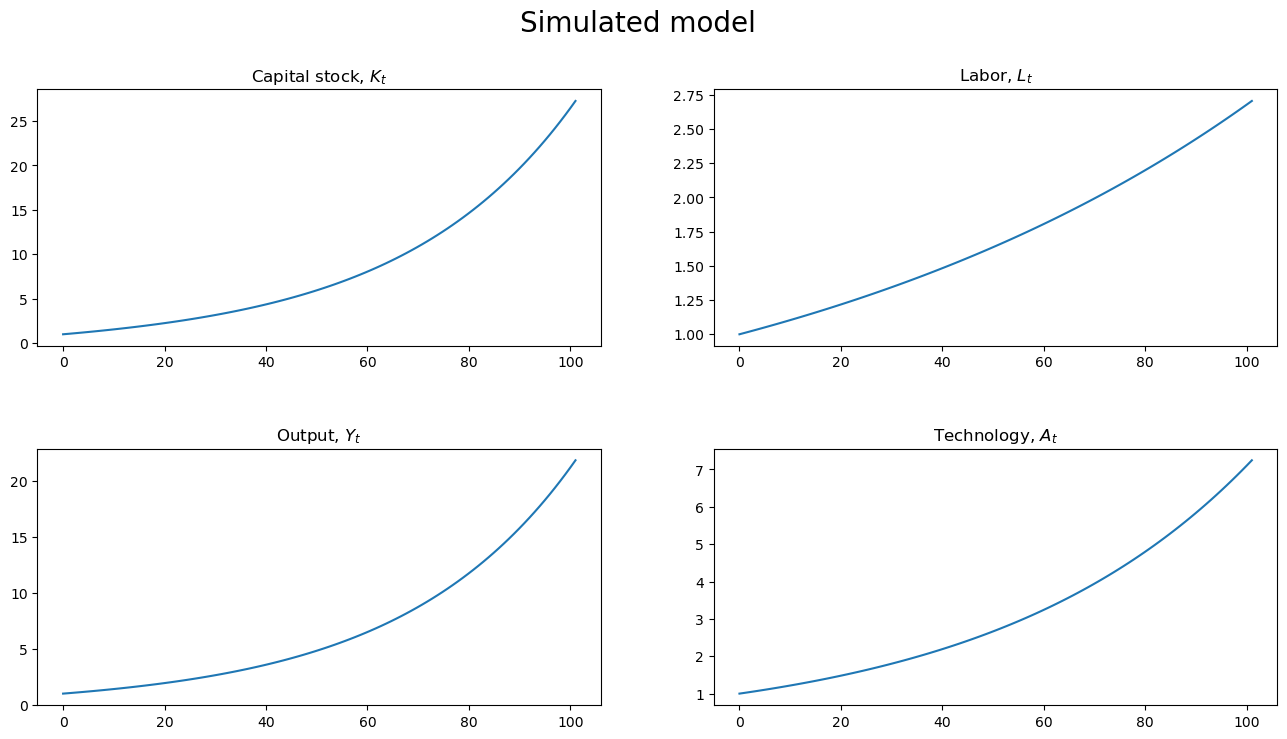

In [13]:
model.simulate(periods = 100, ext=False, do_print=True)

### <a id='toc2_4_2_'></a>[Extended simulation of the model](#toc0_)

The plot below shows the simulated model with limited resources. The plot shows the Capital stock $K_t$, Labor $L_t$, Limited ressource $R_t$, Output $Y_t$, Technology $A_t$, and the Consumption of limited ressource $E_t$.

- 100 periods
- Extended Solow Model with limited resources.
- 6 plots





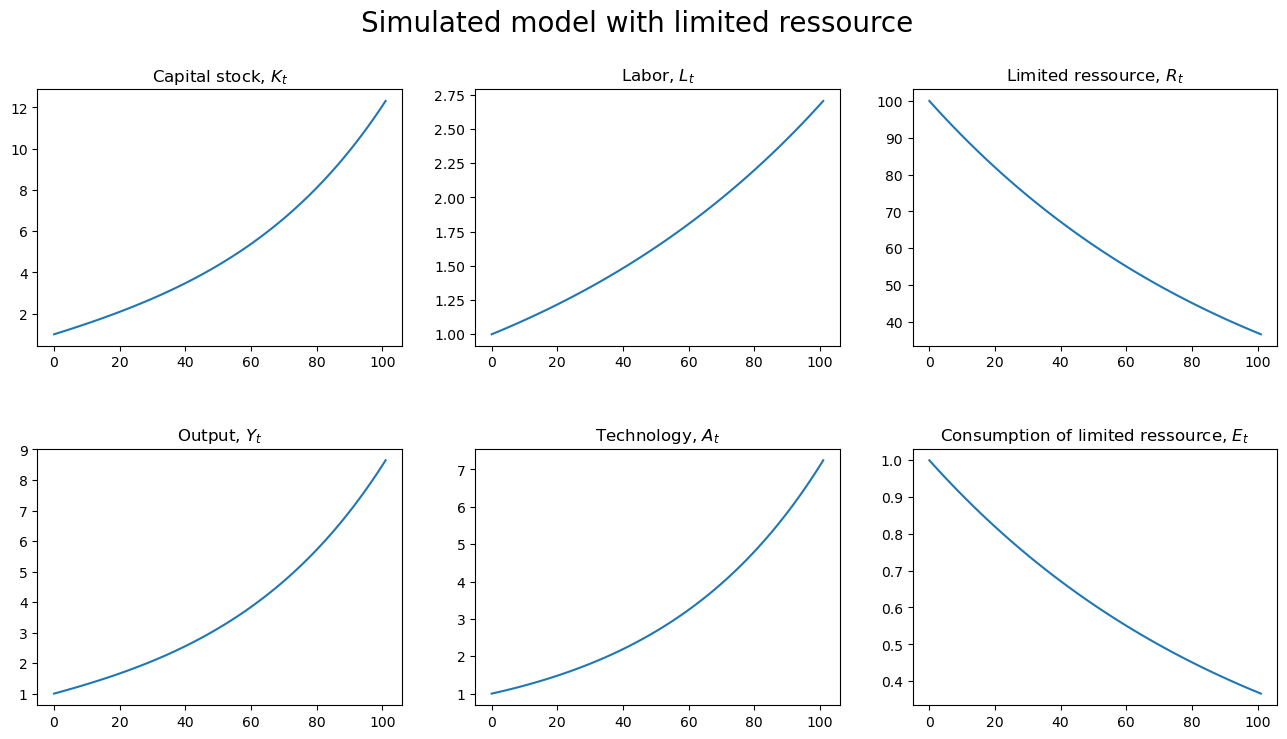

In [14]:
model.simulate(periods = 100, ext=True, do_print=True)


----
## <a id='toc2_5_'></a>[Conclusion](#toc0_)

In this project, we delved into solving the Solow-Swan model, extended with limited resources. This neoclassical growth model is an instrumental tool for understanding long-term economic growth dynamics, taking into account significant factors such as productivity, capital accumulation, population growth, and technological progress.

We used both analytical and numerical methods to determine the steady state of the model. This steady state represents a point in time when the economy stops evolving, signified by a constant capital stock per worker.

The numerical methods employed were the bisect and Brent methods. These methods yielded closely matching results, which were validated by the analytical solution. The Bisect method, though requiring more iterations due to its simple approach, achieved a good approximation to the steady state. In contrast, the Brent method, incorporating the bisection, secant, and inverse quadratic interpolation techniques, demonstrated better efficiency with fewer iterations. 

Moreover, we performed simulations of the model, both the baseline and the extended versions, to understand the dynamic interactions of the variables over time. These simulations were able to capture the impact of incorporating limited resources into the economic growth model.

In conclusion, the project demonstrated the feasibility of numerically solving the Solow-Swan model, even with added complexity such as limited resources. It also underscored the power of simulation in understanding the interplay of different variables in the long-run growth dynamics of an economy.

As future work, the model could be further extended to include more complex dynamics, such as resource replenishment strategies or the inclusion of other important variables, such as human capital. In addition, the model could be applied to real-world data to provide insights into economic policy-making and planning.

---


### Widgets for Parameter Changes

In [15]:
# a. define the widgets
periods_widget = IntSlider(min=10, max=200, step=10, value=100, description='Periods')
alpha_widget = FloatSlider(min=0, max=1, step=0.01, value=0.33, description='alpha')
epsilon_widget = FloatSlider(min=0, max=1, step=0.01, value=0.17, description='epsilon')
delta_widget = FloatSlider(min=0, max=1, step=0.01, value=0.05, description='delta')
s_Y_widget = FloatSlider(min=0, max=1, step=0.01, value=0.1, description='s_Y')
s_E_widget = FloatSlider(min=0, max=1, step=0.01, value=0.01, description='s_E')
n_widget = FloatSlider(min=0, max=1, step=0.01, value=0.01, description='n')
g_widget = FloatSlider(min=0, max=1, step=0.01, value=0.02, description='g')

# b. create the interactive control
interact(model.simulate_widget, periods=periods_widget, 
         alpha=alpha_widget, epsilon=epsilon_widget, delta=delta_widget, 
         s_Y=s_Y_widget, s_E=s_E_widget, n=n_widget, g=g_widget);

interactive(children=(IntSlider(value=100, description='Periods', max=200, min=10, step=10), FloatSlider(value…

In [16]:
# a. define the widgets
periods_widget = IntSlider(min=10, max=200, step=10, value=100, description='Periods')
alpha_widget = FloatSlider(min=0, max=1, step=0.01, value=0.33, description='alpha')
epsilon_widget = FloatSlider(min=0, max=1, step=0.01, value=0.17, description='epsilon')
delta_widget = FloatSlider(min=0, max=1, step=0.01, value=0.05, description='delta')
s_Y_widget = FloatSlider(min=0, max=1, step=0.01, value=0.1, description='s_Y')
s_E_widget = FloatSlider(min=0, max=1, step=0.01, value=0.01, description='s_E')
n_widget = FloatSlider(min=0, max=1, step=0.01, value=0.01, description='n')
g_widget = FloatSlider(min=0, max=1, step=0.01, value=0.02, description='g')

# b. create the interactive control
interact(model.convergence_widget, periods=periods_widget, 
         alpha=alpha_widget, epsilon=epsilon_widget, delta=delta_widget, 
         s_Y=s_Y_widget, s_E=s_E_widget, n=n_widget, g=g_widget);

interactive(children=(FloatSlider(value=0.33, description='alpha', max=1.0, step=0.01), FloatSlider(value=0.17…